# Geopandas

In [1]:
import geopandas as gpd
import shapely.geometry

Geodataframeの作成

<AxesSubplot:>

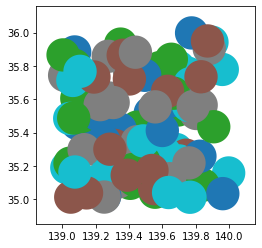

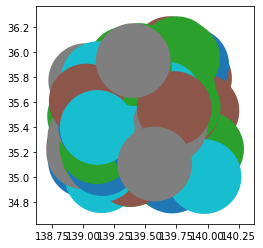

In [2]:
import random
from shapely.geometry import Point
from pyproj import CRS


x_range = (139, 140)
y_range = (35, 36)
n_point_1 =  (100)
n_point_2 =  (100)
rand_class_1 = random.choices(['a', 'b', 'c', 'd', 'e'], k=n_point_1)
rand_class_2 = random.choices(['a', 'b', 'c', 'd', 'e'], k=n_point_2)

x_coords_1 = [random.uniform(*x_range) for i in range(n_point_1)]
y_coords_1 = [random.uniform(*y_range) for i in range(n_point_1)]
x_coords_2 = [random.uniform(*x_range) for i in range(n_point_2)]
y_coords_2 = [random.uniform(*y_range) for i in range(n_point_2)]

crs = CRS.from_user_input(32654)

points_1_gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(x_coords_1, y_coords_1), crs = crs)
points_1_gdf['class'] = rand_class_1
polygon_1_gdf = points_1_gdf.copy()
polygon_1_gdf['geometry'] = points_1_gdf.buffer(0.1)
polygon_1_gdf.plot(column='class')

points_2_gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(x_coords_2, y_coords_2), crs = crs)
points_2_gdf['class'] = rand_class_2
polygon_2_gdf = points_2_gdf.copy()
polygon_2_gdf['geometry'] = points_2_gdf.buffer(0.3)
polygon_2_gdf.plot(column='class')

In [5]:
polygon_2_gdf[21:]

,geometry,class
21,"POLYGON ((140.10511 35.00894, 140.10367 34.979...",b
22,"POLYGON ((139.96232 35.69534, 139.96088 35.665...",c
23,"POLYGON ((139.56626 35.59686, 139.56481 35.567...",a
24,"POLYGON ((139.42768 35.07482, 139.42623 35.045...",a
25,"POLYGON ((139.70617 35.42416, 139.70473 35.394...",a
...,...,...
95,"POLYGON ((139.37862 35.31587, 139.37717 35.286...",c
96,"POLYGON ((140.12965 35.31053, 140.12821 35.281...",c
97,"POLYGON ((139.39881 35.25680, 139.39737 35.227...",c
98,"POLYGON ((139.57723 35.70353, 139.57579 35.674...",c


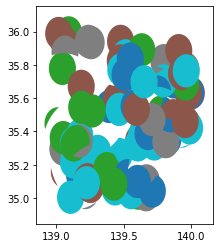

In [8]:
po_1_v = Vector(polygon_1_gdf)
po_2_v = Vector(polygon_2_gdf)
tmp_v = po_1_v.difference(po_2_v)
tmp_v.plot(column='class')

In [11]:
po_1_v.gdf.total_bounds

array([138.91495006,  34.90307304, 140.098773  ,  36.09183615])

In [7]:
int_v

,geometry
0,"POLYGON ((139.50014 35.65670, 139.49966 35.646..."
1,"POLYGON ((139.52186 35.66757, 139.52892 35.664..."
2,"POLYGON ((139.70703 35.97933, 139.70655 35.969..."
3,"POLYGON ((139.20902 35.32835, 139.20854 35.318..."
4,POLYGON EMPTY
...,...
95,POLYGON EMPTY
96,POLYGON EMPTY
97,"POLYGON ((139.61131 35.09420, 139.61083 35.084..."
98,POLYGON EMPTY


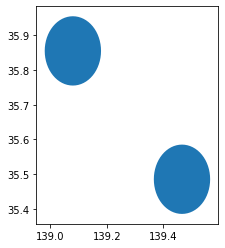

In [46]:
polygon_1_v = Vector(polygon_1_gdf)
polygon_1_v[0:3][[True, True, False]].plot()

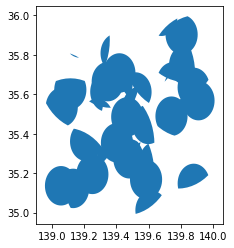

In [35]:
tmp_gdf = gpd.GeoDataFrame(geometry=polygon_1_gdf.intersection(polygon_2_gdf))
tmp_gdf[~tmp_gdf.is_empty].plot()

In [33]:
points_gdf.representative_point()

0     POINT (139.80215 35.83012)
1     POINT (139.56260 35.00986)
2     POINT (139.45344 35.24756)
3     POINT (139.95679 35.66969)
4     POINT (139.57810 35.83197)
                 ...            
95    POINT (139.85639 35.63182)
96    POINT (139.28897 35.80853)
97    POINT (139.65650 35.13089)
98    POINT (139.05659 35.45623)
99    POINT (139.39110 35.36762)
Length: 100, dtype: geometry

In [27]:
type(polygon_gdf.area)

/cats/datastore3/anaconda3_envs/takahisa/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


pandas.core.series.Series

In [6]:
points_gdf.to_file('data/r_points.shp')

In [3]:
polygon_gdf.to_file('data/r_points_buff.shp')

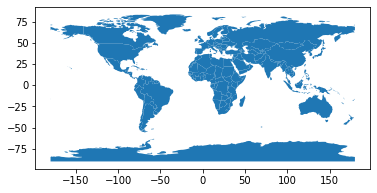

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

In [5]:
points_gdf

,geometry,class
0,POINT (139.80215 35.83012),a
1,POINT (139.56260 35.00986),c
2,POINT (139.45344 35.24756),a
3,POINT (139.95679 35.66969),b
4,POINT (139.57810 35.83197),a
...,...,...
95,POINT (139.85639 35.63182),e
96,POINT (139.28897 35.80853),e
97,POINT (139.65650 35.13089),b
98,POINT (139.05659 35.45623),a


In [17]:
type(points_gdf.shape)

tuple

In [15]:
len(points_gdf)

100

In [13]:
points_gdf[0:2]

,geometry,class
0,POINT (139.80215 35.83012),a
1,POINT (139.56260 35.00986),c


## to_json
It will not convert crs

In [10]:
points_gdf[0:3].to_json(na='null', show_bbox=False)

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"class": "a"}, "geometry": {"type": "Point", "coordinates": [139.8021535768139, 35.830116126832735]}}, {"id": "1", "type": "Feature", "properties": {"class": "c"}, "geometry": {"type": "Point", "coordinates": [139.5625982304562, 35.00985903496143]}}, {"id": "2", "type": "Feature", "properties": {"class": "a"}, "geometry": {"type": "Point", "coordinates": [139.45343932203696, 35.247557751949664]}}]}'

In [11]:
gdf = gpd.read_file('data/r_points_32654.shp')
gdf.to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"class": "a"}, "geometry": {"type": "Point", "coordinates": [391807.377101384, 3965768.2162633785]}}, {"id": "1", "type": "Feature", "properties": {"class": "c"}, "geometry": {"type": "Point", "coordinates": [368845.7032082516, 3875080.3686444876]}}, {"id": "2", "type": "Feature", "properties": {"class": "a"}, "geometry": {"type": "Point", "coordinates": [359294.3825147571, 3901592.930920788]}}, {"id": "3", "type": "Feature", "properties": {"class": "b"}, "geometry": {"type": "Point", "coordinates": [405585.59010235075, 3947814.4281419255]}}, {"id": "4", "type": "Feature", "properties": {"class": "a"}, "geometry": {"type": "Point", "coordinates": [371572.0805592809, 3966245.0322919525]}}, {"id": "5", "type": "Feature", "properties": {"class": "e"}, "geometry": {"type": "Point", "coordinates": [360215.8186737846, 3935019.1132948725]}}, {"id": "6", "type": "Feature", "properties": {"class": "a"}, "g